<a href="https://colab.research.google.com/github/minjung0/IDS706Pj6-NLP/blob/main/NoCodeLowCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project #6: Small Data Engineering NLP and AI APIs with “No Code/Low Code” 

In [1]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
from pathlib import Path
import spacy

### Grab text from github

In [3]:
#grab text
!rm *.txt
!wget https://raw.githubusercontent.com/minjung0/IDS706Pj6-NLP/main/AcrossTheRiver.txt
!wget https://raw.githubusercontent.com/minjung0/IDS706Pj6-NLP/main/GreenHillsOfAfrica.txt
!wget https://raw.githubusercontent.com/minjung0/IDS706Pj6-NLP/main/MenWithoutWomen.txt
!wget https://raw.githubusercontent.com/minjung0/IDS706Pj6-NLP/main/TheOldMan.txt
!wget https://raw.githubusercontent.com/minjung0/IDS706Pj6-NLP/main/TheSunAlsoRises.txt
!wget https://raw.githubusercontent.com/minjung0/IDS706Pj6-NLP/main/WinnerTakeNothing.txt

rm: cannot remove '*.txt': No such file or directory
--2021-12-04 07:02:56--  https://raw.githubusercontent.com/minjung0/IDS706Pj6-NLP/main/AcrossTheRiver.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368297 (360K) [text/plain]
Saving to: ‘AcrossTheRiver.txt’

AcrossTheRiver.txt  100%[===================>] 359.67K  --.-KB/s    in 0.04s   

2021-12-04 07:02:57 (8.12 MB/s) - ‘AcrossTheRiver.txt’ saved [368297/368297]

--2021-12-04 07:02:57--  https://raw.githubusercontent.com/minjung0/IDS706Pj6-NLP/main/GreenHillsOfAfrica.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP re

In [4]:
river_text = Path('AcrossTheRiver.txt').read_text()
green_text = Path('GreenHillsOfAfrica.txt').read_text()
men_text = Path('MenWithoutWomen.txt').read_text()
old_text = Path('TheOldMan.txt').read_text()
sun_text = Path('TheSunAlsoRises.txt').read_text()
winner_text = Path('WinnerTakeNothing.txt').read_text()

### Document Similarity

In [5]:
nlp = spacy.load("en_core_web_lg")

In [6]:
#how similar are Hemingway's books?
river_book = nlp(Path('AcrossTheRiver.txt').read_text())
green_book = nlp(Path('GreenHillsOfAfrica.txt').read_text())
men_book = nlp(Path('MenWithoutWomen.txt').read_text())
old_book = nlp(Path('TheOldMan.txt').read_text())
sun_book = nlp(Path('TheSunAlsoRises.txt').read_text())
winner_book = nlp(Path('WinnerTakeNothing.txt').read_text())

In [7]:
river_book.similarity(green_book)

0.9951084374201319

In [8]:
men_book.similarity(old_book)

0.9907097969065124

In [9]:
sun_book.similarity(winner_book)

0.9984714655659226

### Word Visualizations

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
!python -m textblob.download_corpora

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [11]:
#remove stop words
from textblob import TextBlob
from nltk.corpus import stopwords

In [12]:
stop_words = stopwords.words('english')

In [13]:
river_blob = TextBlob(Path('AcrossTheRiver.txt').read_text())
green_blob = TextBlob(Path('GreenHillsOfAfrica.txt').read_text())
men_blob = TextBlob(Path('MenWithoutWomen.txt').read_text())
old_blob = TextBlob(Path('TheOldMan.txt').read_text())
sun_blob = TextBlob(Path('TheSunAlsoRises.txt').read_text())
winner_blob = TextBlob(Path('WinnerTakeNothing.txt').read_text())

In [14]:
#without stop word removal
river_count = river_blob.word_counts.items()
green_count = green_blob.word_counts.items()
men_count = men_blob.word_counts.items()
old_count = old_blob.word_counts.items()
sun_count = sun_blob.word_counts.items()
winner_count = winner_blob.word_counts.items()

In [35]:
from pandas import DataFrame

river_df = DataFrame(river_count)
river_df.to_csv("raw_word_count.csv")
green_df = DataFrame(green_count)
green_df.to_csv("raw_word_green.csv")
men_df = DataFrame(men_count)
men_df.to_csv("raw_word_men.csv")
old_df = DataFrame(old_count)
old_df.to_csv("raw_word_old.csv")
sun_df = DataFrame(sun_count)
sun_df.to_csv("raw_word_sun.csv")
winner_df = DataFrame(winner_count)
winner_df.to_csv("raw_word_winner.csv")

In [15]:
print(len(river_count), len(green_count), len(men_count), len(old_count), len(sun_count), len(winner_count))

5910 5259 3540 2519 4953 4077


In [16]:
def remove_stop(words):
    no_stop = []
    for word in words:
        if word[0] not in stop_words:
            no_stop.append(word[0])
    return no_stop

In [17]:
river_no_stop_words = remove_stop(river_count)
green_no_stop_words = remove_stop(green_count)
men_no_stop_words = remove_stop(men_count)
old_no_stop_words = remove_stop(old_count)
sun_no_stop_words = remove_stop(sun_count)
winner_no_stop_words = remove_stop(winner_count)

In [18]:
#the stop words are removed
print(len(river_no_stop_words), len(green_no_stop_words), len(men_no_stop_words), len(old_no_stop_words), len(sun_no_stop_words), len(winner_no_stop_words))

5771 5120 3405 2394 4811 3942


In [19]:
# A few words
print(river_no_stop_words[0:10])
print(green_no_stop_words[0:10])
print(men_no_stop_words[0:10])
print(old_no_stop_words[0:10])
print(sun_no_stop_words[0:10])
print(winner_no_stop_words[0:10])

['across', 'river', 'trees', 'ernest', 'hemingway', 'london', '1952', 'readers', 'union', 'jonathan']
['green', 'hills', 'africa', 'ernest', 'hemingway', 'jonathan', 'cape', 'thirty', 'bedford', 'square']
['men', 'without', 'women', 'ernest', 'hemingway', 'evan', 'shipman', 'stories', 'first', 'published']
['old', 'man', 'sea', 'ernest', 'hemingway', 'charles', 'scribner', 'sons', 'new', 'york']
['sun', 'also', 'rises', 'ernest', 'hemingway', 'book', 'hadley', 'john', 'nicanor', 'lost']
['winner', 'take', 'nothing', 'ernest', 'hemingway', 'unlike', 'forms', 'lutte', 'combat', 'conditions']


### Word cloud

In [20]:
from wordcloud import WordCloud

In [21]:
river_cloud_text = str1 = ' '.join(river_no_stop_words)
river_cloud = WordCloud().generate(river_cloud_text)

(-0.5, 399.5, 199.5, -0.5)

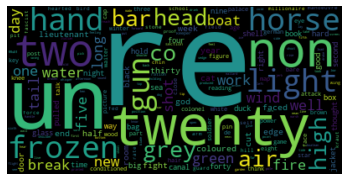

In [22]:
import matplotlib.pyplot as plt
plt.imshow(river_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

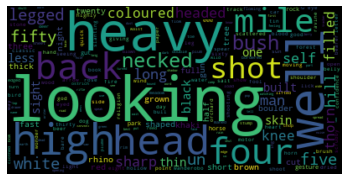

In [23]:
green_cloud_text = str1 = ' '.join(green_no_stop_words)
green_cloud = WordCloud().generate(green_cloud_text)
plt.imshow(green_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

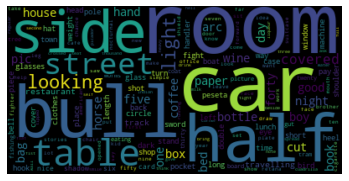

In [24]:
men_cloud_text = str1 = ' '.join(men_no_stop_words)
men_cloud = WordCloud().generate(men_cloud_text)
plt.imshow(men_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

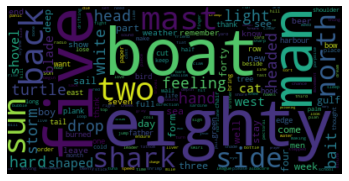

In [25]:
old_cloud_text = str1 = ' '.join(old_no_stop_words)
old_cloud = WordCloud().generate(old_cloud_text)
plt.imshow(old_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

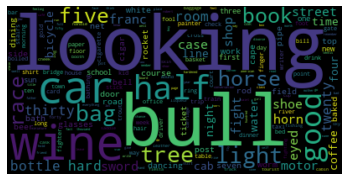

In [26]:
sun_cloud_text = str1 = ' '.join(sun_no_stop_words)
sun_cloud = WordCloud().generate(sun_cloud_text)
plt.imshow(sun_cloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

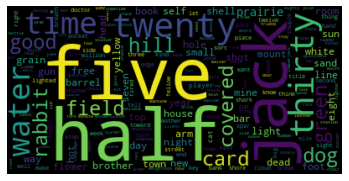

In [27]:
winner_cloud_text = str1 = ' '.join(winner_no_stop_words)
winner_cloud = WordCloud().generate(winner_cloud_text)
plt.imshow(winner_cloud, interpolation='bilinear')
plt.axis("off")

### Cloud-based NoCode-LowCode Tool

In [28]:
df = DataFrame(river_no_stop_words, columns=["AcrossTheRiver.txt"])
df.to_csv("AcrossTheRiver.txt",index=False)

In [29]:
from plotly.offline import iplot
import plotly.graph_objs as go

fig = go.Figure(data=go.Bar(y=river_no_stop_words))
iplot(fig)

In [30]:
df = DataFrame(green_no_stop_words, columns=["GreenHillsOfAfrica.txt"])
df.to_csv("GreenHillsOfAfrica.txt",index=False)
fig = go.Figure(data=go.Bar(y=green_no_stop_words))
iplot(fig)

In [31]:
df = DataFrame(men_no_stop_words, columns=["MenWithoutWomen.txt"])
df.to_csv("MenWithoutWomen.txt",index=False)
fig = go.Figure(data=go.Bar(y=men_no_stop_words))
iplot(fig)

In [32]:
df = DataFrame(old_no_stop_words, columns=["TheOldMan.txt"])
df.to_csv("TheOldMan.txt",index=False)
fig = go.Figure(data=go.Bar(y=old_no_stop_words))
iplot(fig)

In [33]:
df = DataFrame(sun_no_stop_words, columns=["TheSunAlsoRises.txt"])
df.to_csv("TheSunAlsoRises.txt",index=False)
fig = go.Figure(data=go.Bar(y=sun_no_stop_words))
iplot(fig)

In [34]:
df = DataFrame(winner_no_stop_words, columns=["WinnerTakeNothing.txt"])
df.to_csv("WinnerTakeNothing.txt",index=False)
fig = go.Figure(data=go.Bar(y=winner_no_stop_words))
iplot(fig)